<a href="https://colab.research.google.com/github/girotodenis/semisupervisionada/blob/master/RL_Deep_Learning_2019_1_NOME_INICIAL_DOS_INTEGRANTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios - Reinforcement Learning

NOME COMPLETO DOS INTEGRANTES DO GRUPO: Denis Silva Giroto

MATRÍCULAS DOS INTEGRANTES DO GRUPO:

**AVISOS**:

- **Mantenha a estrutura de enunciados e células de resposta da lista original na lista a ser entregue.**
- **Todas as análises e justificativas solicitadas devem estar acompanhadas de códigos e plots realizados.**
- **As listas deverão ser compartilhadas no e-mail nguerinjr@gmail.com .**

# EXERCÍCIOS

## EXERCÍCIO 1

Refere-se aos exemplos de código apresentados em sala de aula.

### 1.1 



Com o passar as iterações / experiências do agente, as correções aplicadas à função de valor tendem a cair. Nos exemplos, essa variação era denotada por um delta. Dessa maneira, pode ser mais interessante eficiente impor uma restrição com um delta, que denota a convergência do algoritmo, ao invés de obedecer cegamente ao número de iterações específicados.

Faça uma versão do algoritmo de programação dinâmica e do de Monte Carlo que recebe um número desejado de iterações mas que tem como critério de convergência um delta, testado com relação a limiar de parada. Rode experimentos variando o limiar de delta e exiba os resultados da política greedy obtida.

In [0]:
# Células de código aqui

In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

1 - Policy Evaluation

In [0]:
gamma = 1
reward_value = -1 # Exceto nos estados terminais
grid_size = 4
terminal_states = [[0,0], [grid_size-1, grid_size-1]] # Estados terminais nas pontas do grid
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]] # Deslocamento das ações: baixo, cima, direita, esquerda
iterations = 1000

In [0]:
def actionRewardFunction(init_positions, action):
    
    # Caso esteja no estado terminal, a recompensa é 0
    if init_positions in terminal_states:
        return init_positions, 0
    
    reward = reward_value
    # Calcula a nova posição
    final_positions = np.array(init_positions) + np.array(action)
    # Se a nova posição tira o agente do grid, ele retorna ao estado anterior
    if -1 in final_positions or 4 in final_positions: 
        final_positions = init_positions
    
    return final_positions, reward

In [0]:
value_map = np.zeros((grid_size, grid_size))
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [0]:
deltas = []

for it in range(iterations):

    if(len(deltas)>0 and np.mean(deltas[-1])==0.0):
      print('numero interacao',it) 
      break

    copyvalue_map = np.copy(value_map)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            final_positions, reward = actionRewardFunction(state, action)
            # 1/len(actions) porque a política é uma distribuição uniforme
            weightedRewards += (1/len(actions)) * (reward + gamma * value_map[final_positions[0], final_positions[1]])
        # Pode ser utilizado para verificar o quanto há de mudança nos backups da policy iteration
       
        deltaState.append(np.abs(copyvalue_map[state[0], state[1]] - weightedRewards))
        copyvalue_map[state[0], state[1]] = weightedRewards
   
    deltas.append(deltaState)
    value_map = copyvalue_map



numero interacao 634


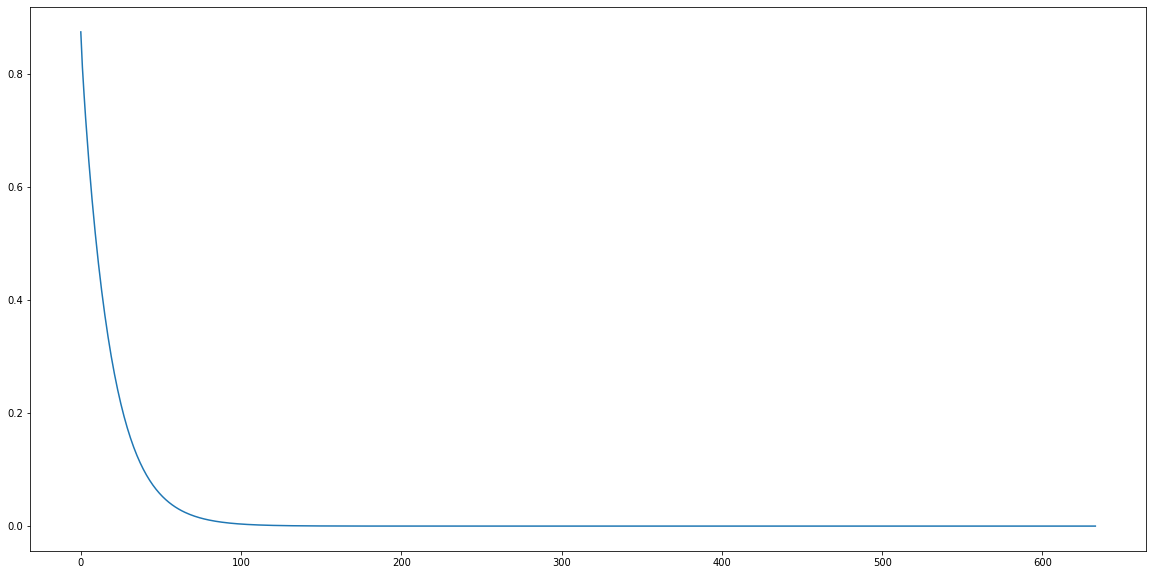

In [0]:
plt.figure(figsize=(20, 10))
mean_delta = np.mean(deltas, axis=1)
plt.plot(mean_delta)


Exemplo 2 - Monte Carlo

In [0]:
gamma = 0.6
reward_value = -1
grid_size = 4
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
iterations = 10000

In [0]:
V = np.zeros((grid_size, grid_size))
returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]


In [0]:
def generateEpisode():
    init_state = random.choice(states[1:-1])
    episode = []
    while True:
        if list(init_state) in terminal_states:
            return episode
        action = random.choice(actions)
        final_state = np.array(init_state) + np.array(action)
        if -1 in list(final_state) or grid_size in list(final_state):
            final_state = init_state
        episode.append([list(init_state), action, reward_value, list(final_state)])
        init_state = final_state

In [0]:
for it in range(iterations):
    episode = generateEpisode()
    G = 0

    mediadelta = 1;
    if(it>1):
      ultimoserros = []
      all_series = [list(x)[1:] for x in deltas.values()]
      for posi in all_series:
        if(len(posi)>0):
          ultimoserros.append(posi[-1])
      mediadelta = np.mean(ultimoserros)
    
    if(mediadelta<0.001):
      print("total it",it)
      break

    episode = episode[::-1]
    for i, (initial_position, action, reward, final_position) in enumerate(episode):
        G = gamma * G + reward # Usa a propriedade recursiva do horizonte descontado
        # First-visit MC: só considera o retorno obtido se o estado não foi visitado
        # Every-visit MC: considera todos os retornos obtidos em visitas a um único estado
        if initial_position not in [x[0] for x in episode[len(episode)-i:]]:
            idx = tuple(initial_position)
            # Returns vai guardar o horizonte para este estado naquele momento
            returns[idx].append(G)
            new_value = np.average(returns[idx])
            deltas[idx].append(np.abs(V[idx] - new_value))
            V[idx] = new_value

total it 586


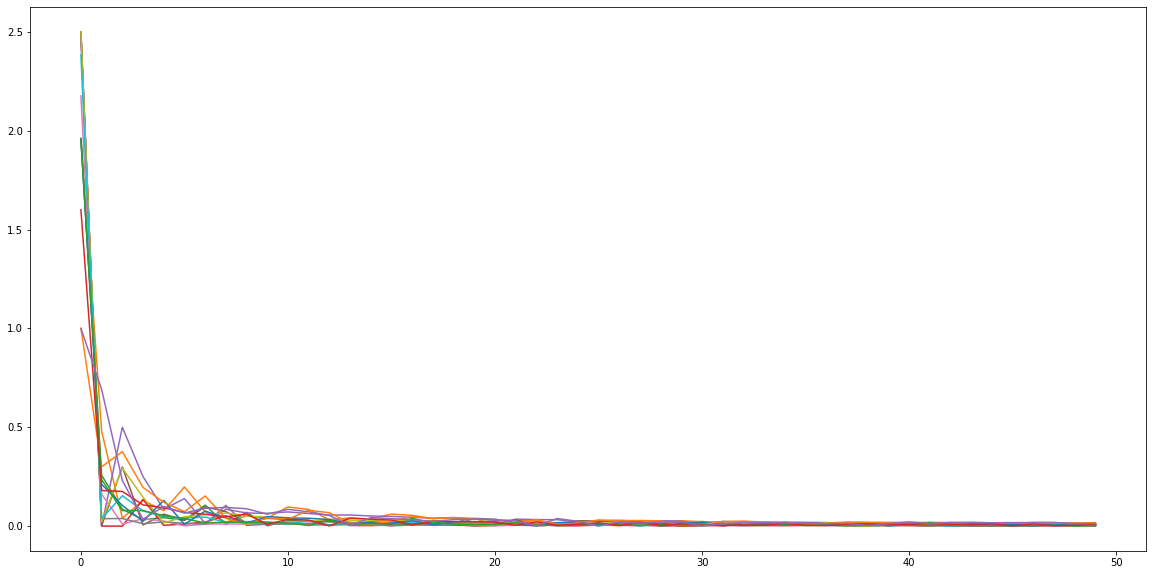

In [0]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

### 1.2

Implemente no exemplo de TD(0) uma estratégia epsilon-greedy, ao invés de uma escolha aleatória de ações. Para decidir qual a ação greedy em um determinado momento, é necessário considerar a maior função de valor nas redondezas de um estado.

Faça experimentos variando o epsilon. Compare os resultados da política greedy após 10, 100, 500 e 1000 episódios, em cada um dos cenários. 

Compare esses resultados com os resultados de uma política greedy após 10, 100, 500 e 1000 episódios considerando o código original de exemplo.

Responda com base nos experimentos e plots apresentados: qual o impacto do fator de exploração do agente ao usar o TD(0)?

In [0]:
# Células de código aqui

In [0]:
# parameters
gamma = 0.1 # discounting rate
reward_value = -1
grid_size = 4
alpha = 0.1 # (0,1] // stepSize
terminal_states = [[0,0], [grid_size-1, grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
iterations = 10000

In [0]:
V = np.zeros((grid_size, grid_size))
returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [0]:
def generateInitialState():
    initial_state = random.choice(states[1:-1])
    return tuple(initial_state)

def generateNextAction():
    return random.choice(actions)

def takeAction(state, action):
    if list(state) in terminal_states:
        return 0, None
    final_state = np.array(state) + np.array(action)
    if -1 in list(final_state) or grid_size in list(final_state):
        final_state = state
    return reward_value, tuple(final_state)

In [0]:
for it in range(iterations):
    initial_state = generateInitialState()

   # if it in [0, 1, 2, 9, 99, iterations-1]:
   #     print("\nIteration {}".format(it))
   #     print(V)
   #     print("")
        
    while True:
        action = generateNextAction()
        reward, final_state = takeAction(initial_state, action)
        
        if final_state is None:
            break
        
        before =  V[initial_state]
        V[initial_state] += alpha * (reward + gamma * V[final_state] - V[initial_state])
        deltas[initial_state].append(float(np.abs(before - V[initial_state])))
        
        initial_state = final_state

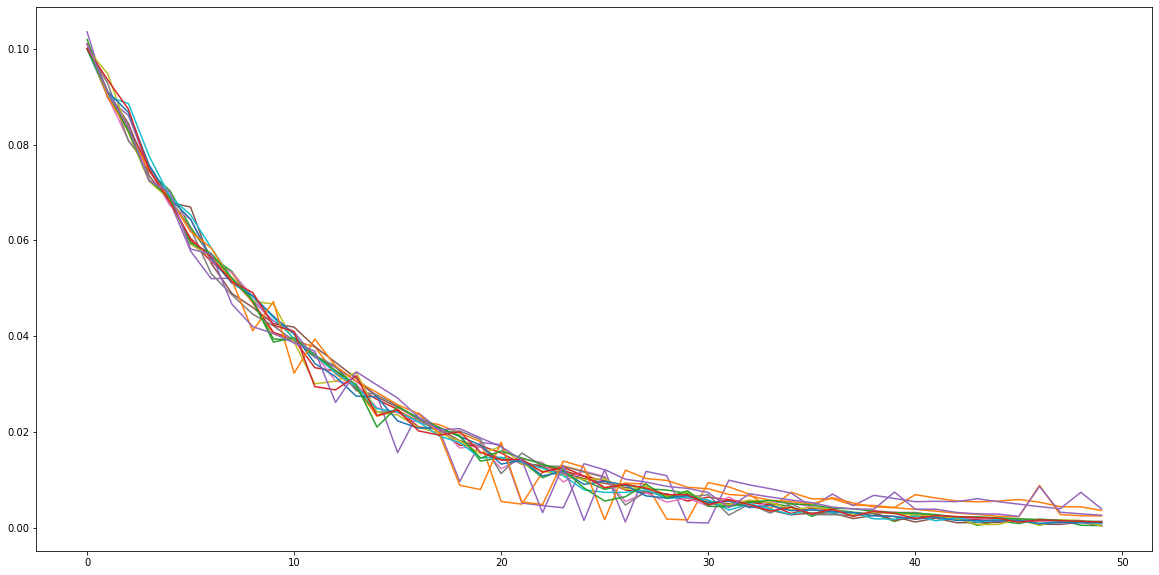

In [0]:
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

Respostas

In [0]:
def generateInitialState(states):
    initial_state = random.choice(states[1:-1])
    return tuple(initial_state)

def exploit(values, actions):
     index = values.index(max(values));
     return actions[index]

def explore(actions):
    return random.choice(actions)

def generateNextAction(epsilon, values, actions ):
    p = np.random.random()
    if (p<epsilon):
        return explore(actions)
    else:
        return exploit(values, actions)        
            

def takeAction(state, action, terminal_states, reward_value, grid_size):
    if list(state) in terminal_states:
        return 0, None
    final_state = np.array(state) + np.array(action)
    if -1 in list(final_state) or grid_size in list(final_state):
        final_state = state
    return reward_value, tuple(final_state)


def gerar(epsilon = 0.1, iterations = 1000):
    
    # parameters
    gamma = 0.1 # discounting rate
    reward_value = -1
    grid_size = 4
    alpha = 0.1 # (0,1] // stepSize
    terminal_states = [[0,0], [grid_size-1, grid_size-1]]
    actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
    
    V = np.zeros((grid_size, grid_size))
    returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
    deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
    states = [[i, j] for i in range(grid_size) for j in range(grid_size)]
    values = [0,0,0,0]

    for it in range(iterations):
        initial_state = generateInitialState(states)
    
       # if it in [0, 1, 2, 9, 99, iterations-1]:
       #     print("\nIteration {}".format(it))
       #     print(V)
       #     print("")
            
        while True:
            action = generateNextAction(epsilon, values, actions)
            reward, final_state = takeAction(initial_state, action,terminal_states, reward_value, grid_size)
            
            if final_state is None:
                break
            
            before =  V[initial_state]
            
            V[initial_state] += alpha * (reward + gamma * V[final_state] - V[initial_state])
            
            indiceAction = actions.index(action)
            values[indiceAction] = V[initial_state]
            
            deltas[initial_state].append(float(np.abs(before - V[initial_state])))
            
            initial_state = final_state
    
    all_series = [list(x)[:50] for x in deltas.values()]
    return all_series

<Figure size 1440x720 with 0 Axes>

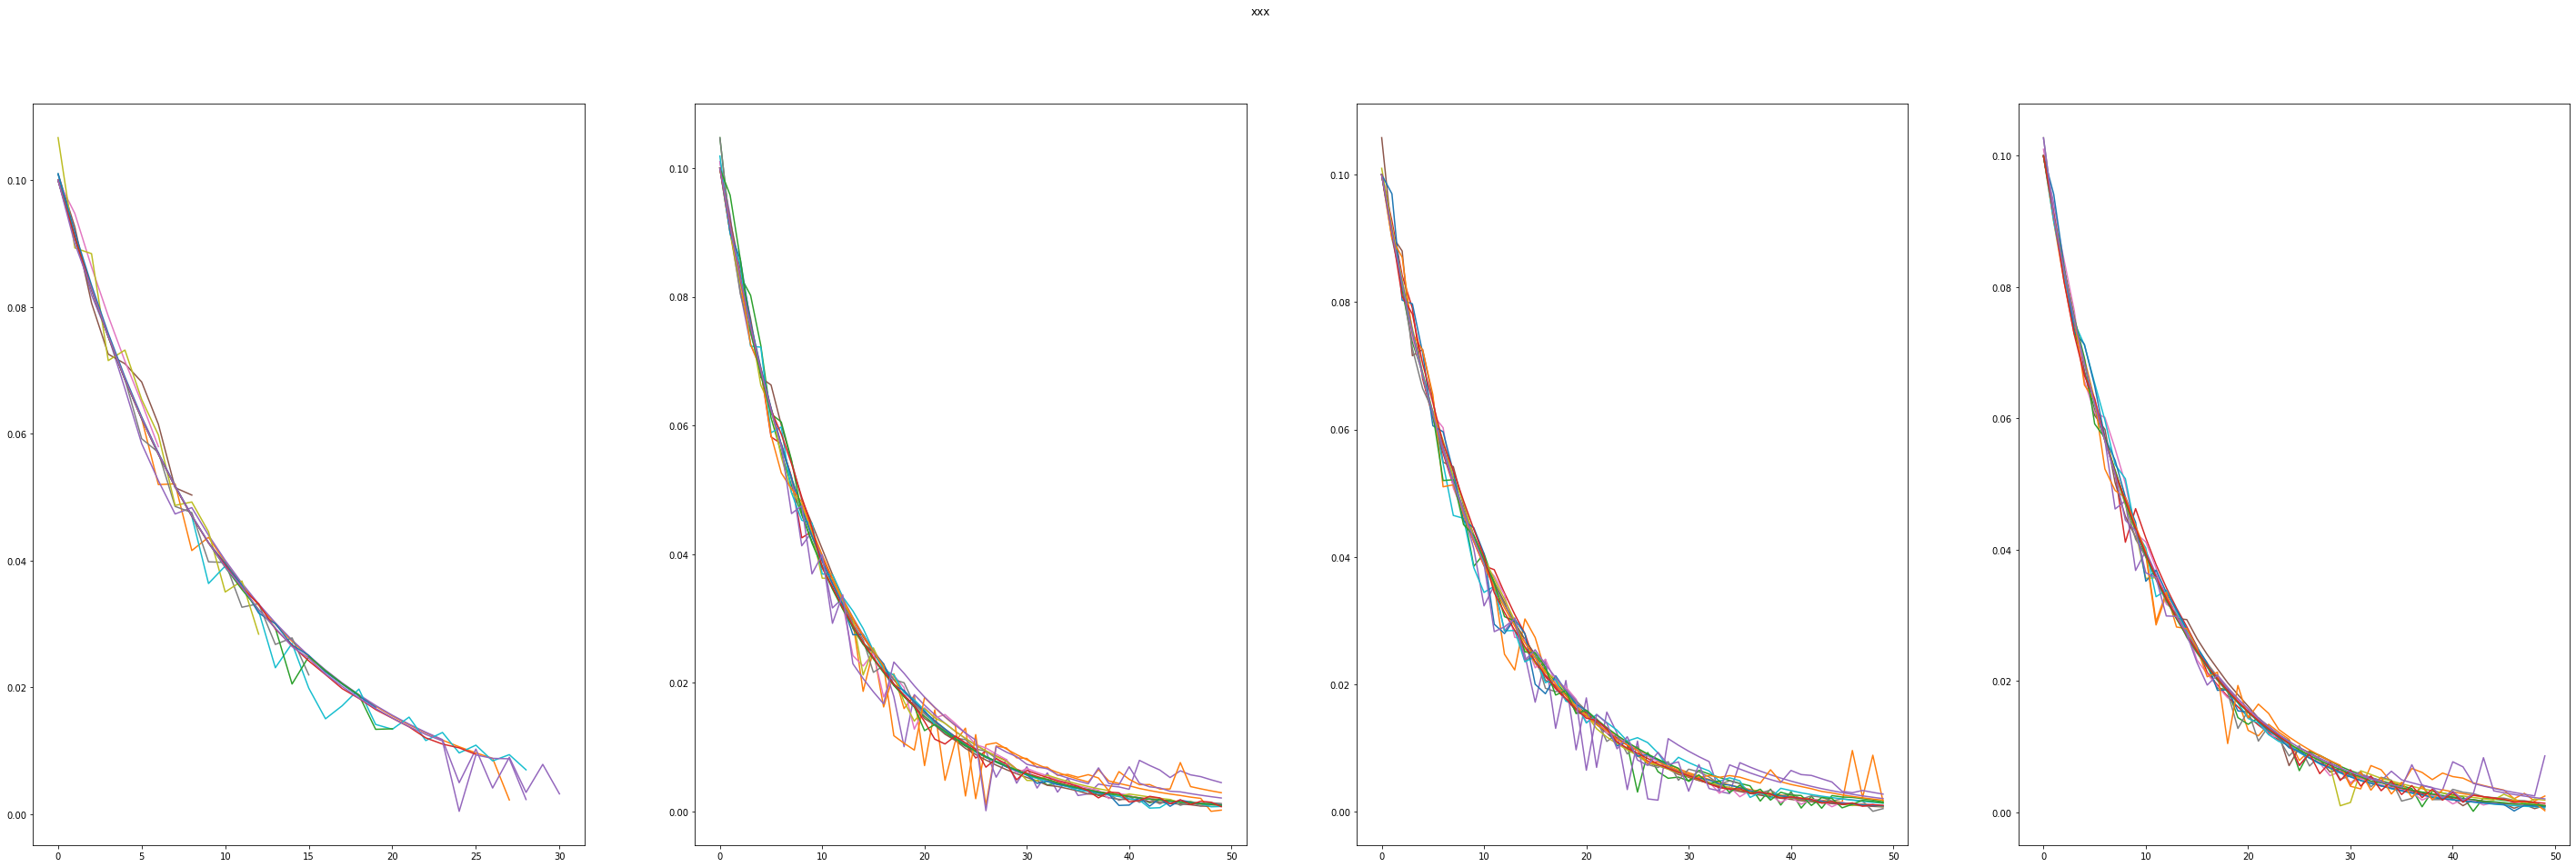

In [0]:
plt.figure(figsize=(20,10))
#all_series = gerar()#[list(x)[:50] for x in deltas.values()]
#for series in all_series:
#    plt.plot(series)
plt.tight_layout()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(50,15))
fig.suptitle('xxx')


all_series1 = gerar(0.1,10)
all_series2 = gerar(0.1,100)
all_series3 = gerar(0.1,500)
all_series4 = gerar(0.1,1000)



for series in all_series1:
    ax1.plot(series)
for series in all_series2:
    ax2.plot(series)
for series in all_series3:
    ax3.plot(series)
for series in all_series4:
    ax4.plot(series)


<Figure size 1440x720 with 0 Axes>

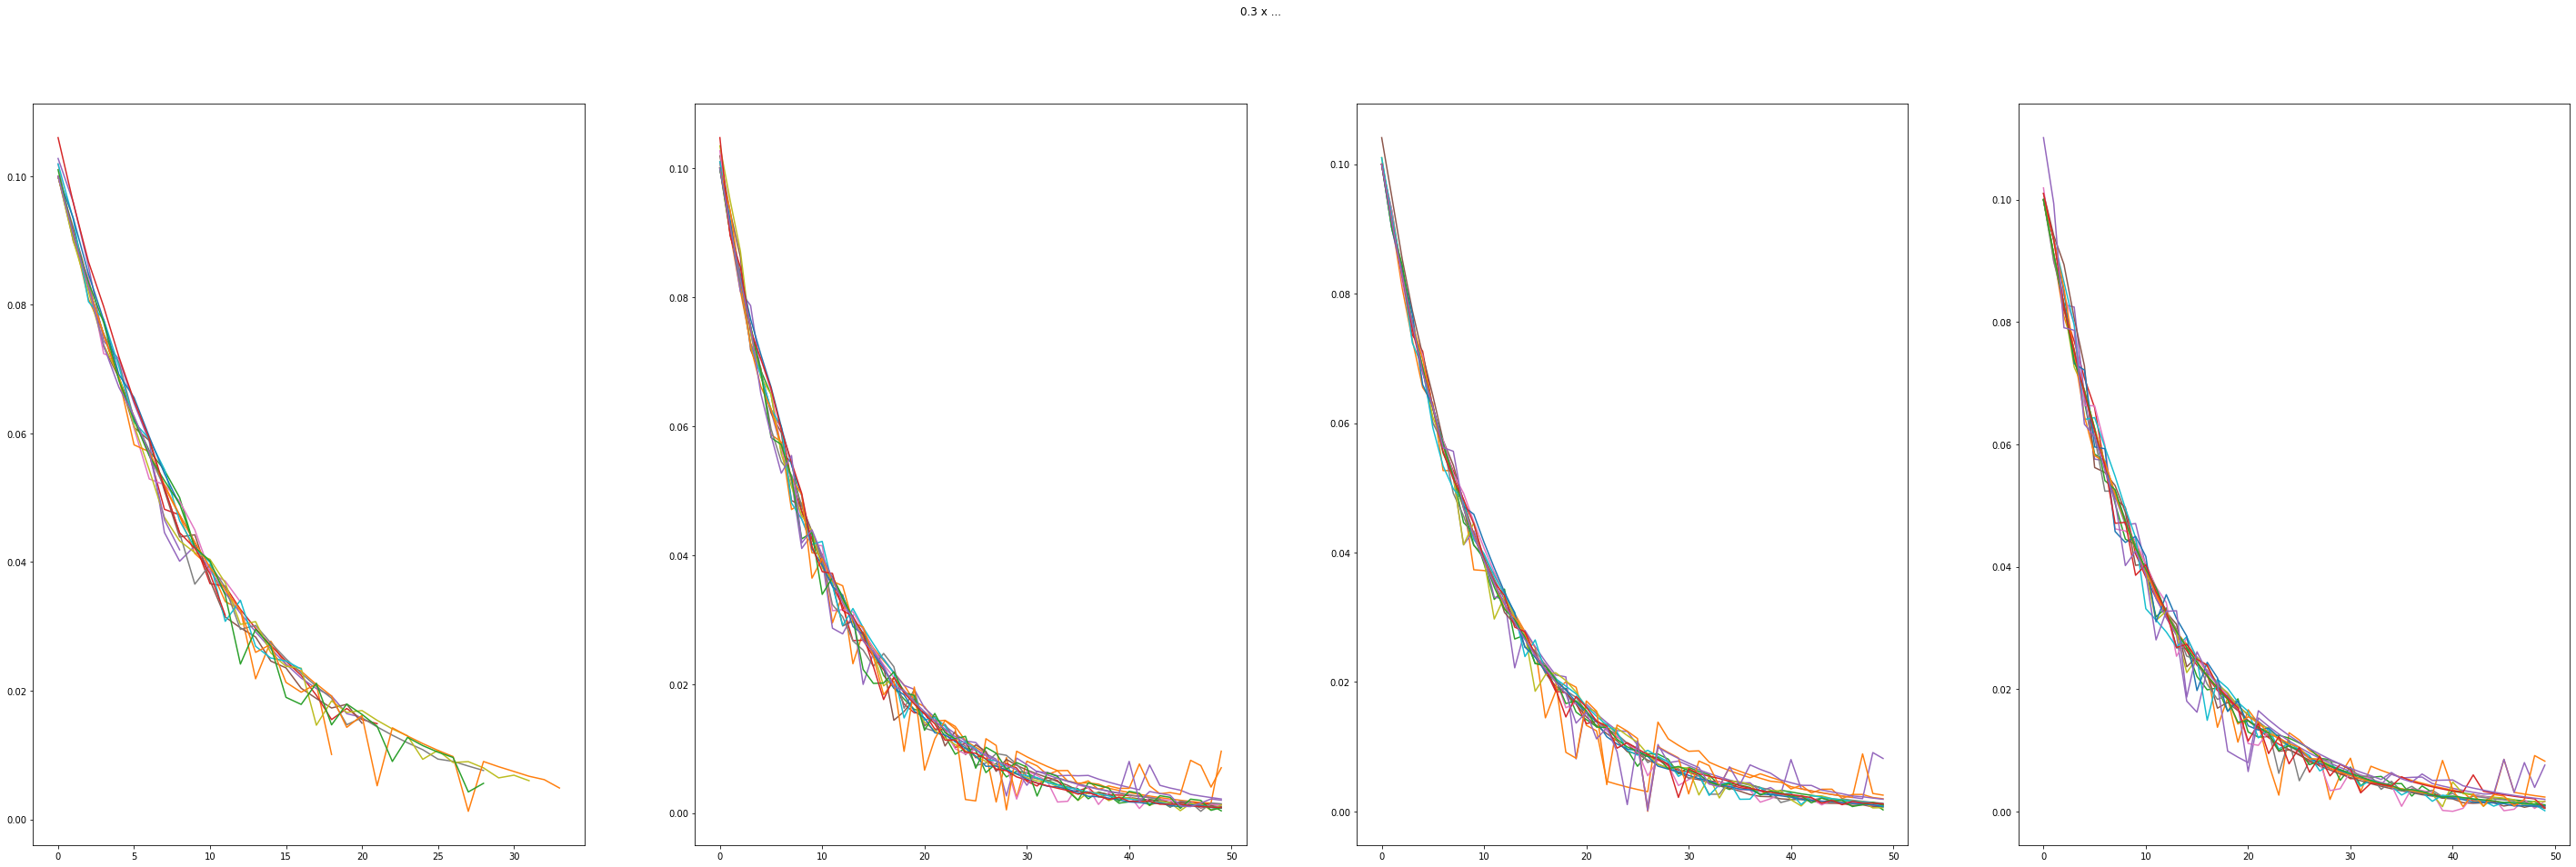

In [0]:

plt.figure(figsize=(20,10))
plt.tight_layout()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(50,15))
fig.suptitle('0.3 x ...')

all_series5 = gerar(0.3,10)
all_series6 = gerar(0.3,100)
all_series7 = gerar(0.3,500)
all_series8 = gerar(0.3,1000)

for series in all_series5:
    ax1.plot(series)
for series in all_series6:
    ax2.plot(series)
for series in all_series7:
    ax3.plot(series)
for series in all_series8:
    ax4.plot(series)



<Figure size 1440x720 with 0 Axes>

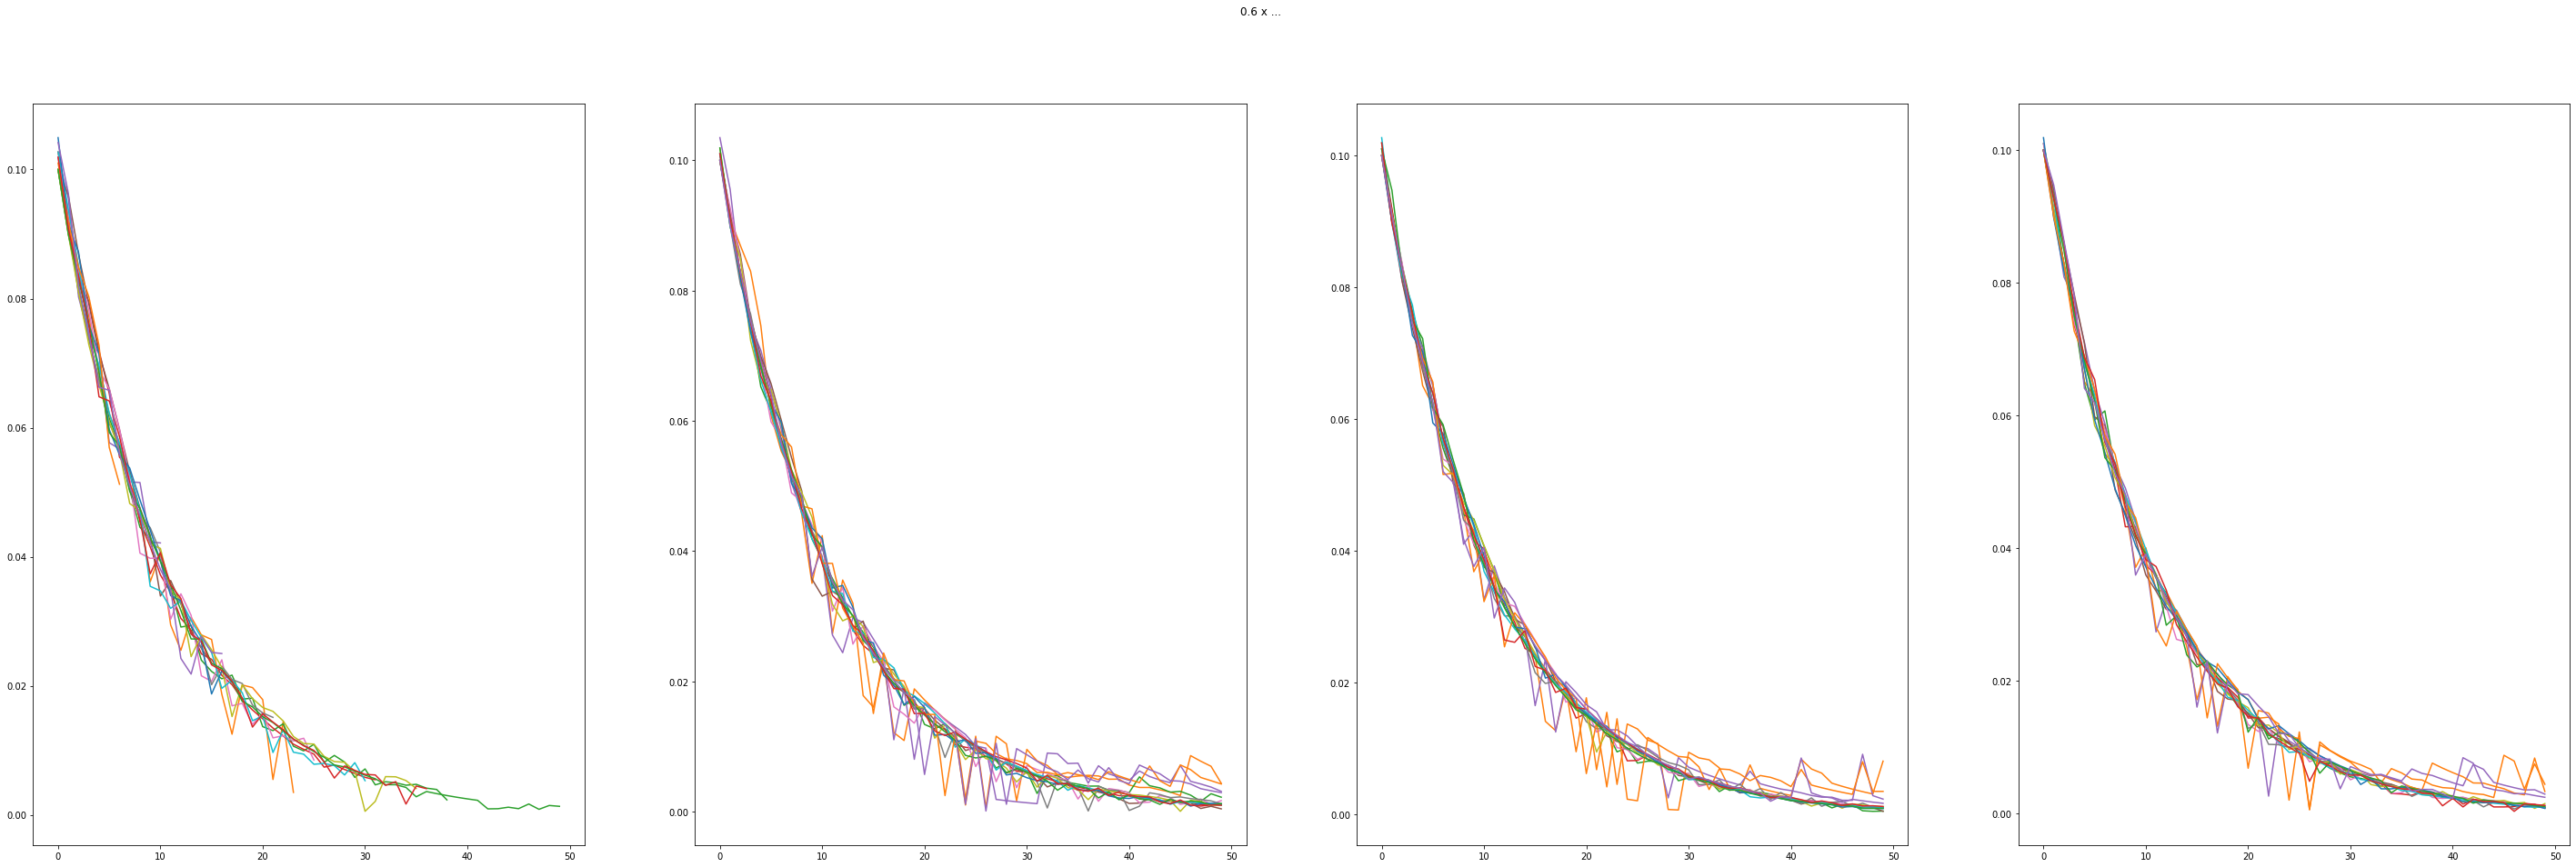

In [0]:
plt.figure(figsize=(20,10))
plt.tight_layout()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(50,15))
fig.suptitle('0.6 x ...')

all_series9 = gerar(0.6,10)
all_series10 = gerar(0.6,100)
all_series11 = gerar(0.6,500)
all_series12 = gerar(0.6,1000)

for series in all_series9:
    ax1.plot(series)
for series in all_series10:
    ax2.plot(series)
for series in all_series11:
    ax3.plot(series)
for series in all_series12:
    ax4.plot(series)

## EXERCÍCIO 2

Diz respeito aos exemplos teóricos formulados em sala de aula.

### 2.1

Implemente o Sarsa para o exemplo do grid com o vento apresentado em sala de aula (ver exemplo e explicações detalhadas no livro referência). 

Lembrese: a diferença do Sars é que ao invés de usar a função valor-estado (função v), utiliza-se a função de estado-ação (função Q).

Implemente uma estratégia epsilon-greedy e escolha os hiperparâmetros de forma a haver convergência do agente. Faça o experimento com 50, 100 e 1000 e 10000 episódios. Observe a política greedy do agente após esse número de episódios.

Responda com base nos experimentos e plots: o agente consegue chegar de maneira interessante ao objetivo?

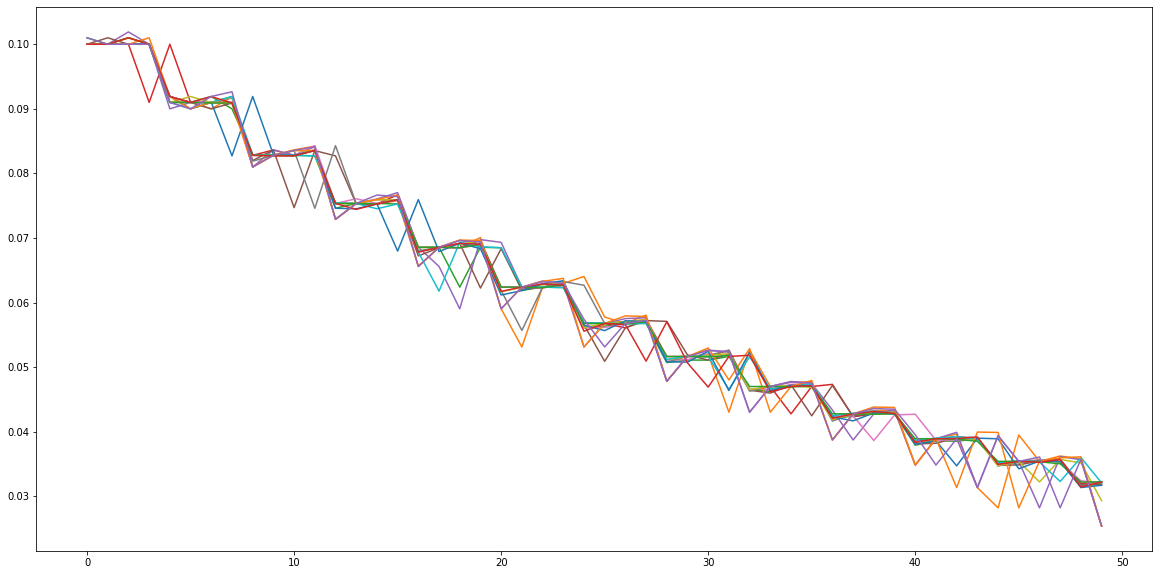

In [0]:
# Células de código aqui
def generateInitialState(states):
    initial_state = random.choice(states[1:-1])
    return tuple(initial_state)
           

def takeAction(state, action, terminal_states, grid_size):
    if list(state) in terminal_states:
        return None
    final_state = np.array(state) + np.array(action)
    if -1 in list(final_state) or grid_size in list(final_state):
        final_state = state
    return tuple(final_state)

class Cell:
    def __init__(self, actions, row, col):
        self.cell = (row, col)
        self.value = 0
        self.values = [0 for a in actions];
        self.indexActions = -1;
        
    def epsilon_greedy(self, epsilon, actions ):
        p = np.random.random()
        if (p < epsilon):
            return self.explore(actions)
        else:
            return self.exploit(actions)   
    
    def exploit(self, actions):
        self.indexActions = self.values.index(max(self.values))
        action = actions[self.indexActions]
        self.value = self.values[self.indexActions]
        return action
 
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        self.value = self.values[self.indexActions]
        return action
    
    def learn(self, alpha, reward_value, gamma, cell_final_state ):
        #self.value += alpha * (reward_value + gamma * cell_final_state.value - self.value)
        self.value += alpha * (reward_value + gamma * cell_final_state.values[self.indexActions] - self.value)
        self.values[self.indexActions] = self.value
        
    def __str__(self):
        return "cell:{0} value: {1}, top: {2}, down: {3}, right: {4}, left: {5}".format(self.cell, self.value, self.values[0], self.values[1],self.values[2],self.values[3])


def sarsa(epsilon = 0.1, iterations = 1000):
    
    # parameters
    gamma = 0.1 
    reward_value = -1
    grid_size = 4
    alpha = 0.1 
    terminal_states = [[0,0], [grid_size-1, grid_size-1]]
    actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
    
    tmp = [[Cell(actions,row,col) for row in range(grid_size)] for col in range(grid_size)]
    Q = np.array(tmp)
    #Q = np.zeros((grid_size, grid_size))
    
    returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
    deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
    states = [[i, j] for i in range(grid_size) for j in range(grid_size)]
    values = [0,0,0,0]

    for it in range(iterations):
        s = generateInitialState(states)

            
        while True:
            
            current_cell = Q[s]
            
            #print(current_cell)
            
            action = current_cell.epsilon_greedy(epsilon, actions)
            final_state = takeAction(s, action, terminal_states, grid_size)
            
            if final_state is None:
                break
            
            next_cell =  Q[final_state]
            old_cell_value = current_cell.value
            #Q[s] += alpha * (reward_value + gamma * Q[final_state] - Q[s])
            current_cell.learn(alpha, reward_value, gamma, next_cell )
           
            deltas[s].append(float(np.abs(old_cell_value - current_cell.value)))
            
            s = final_state
    
    all_series = [list(x)[:50] for x in deltas.values()]
    return all_series

        
plt.figure(figsize=(20,10))
all_series = sarsa()#[list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

<Figure size 1440x720 with 0 Axes>

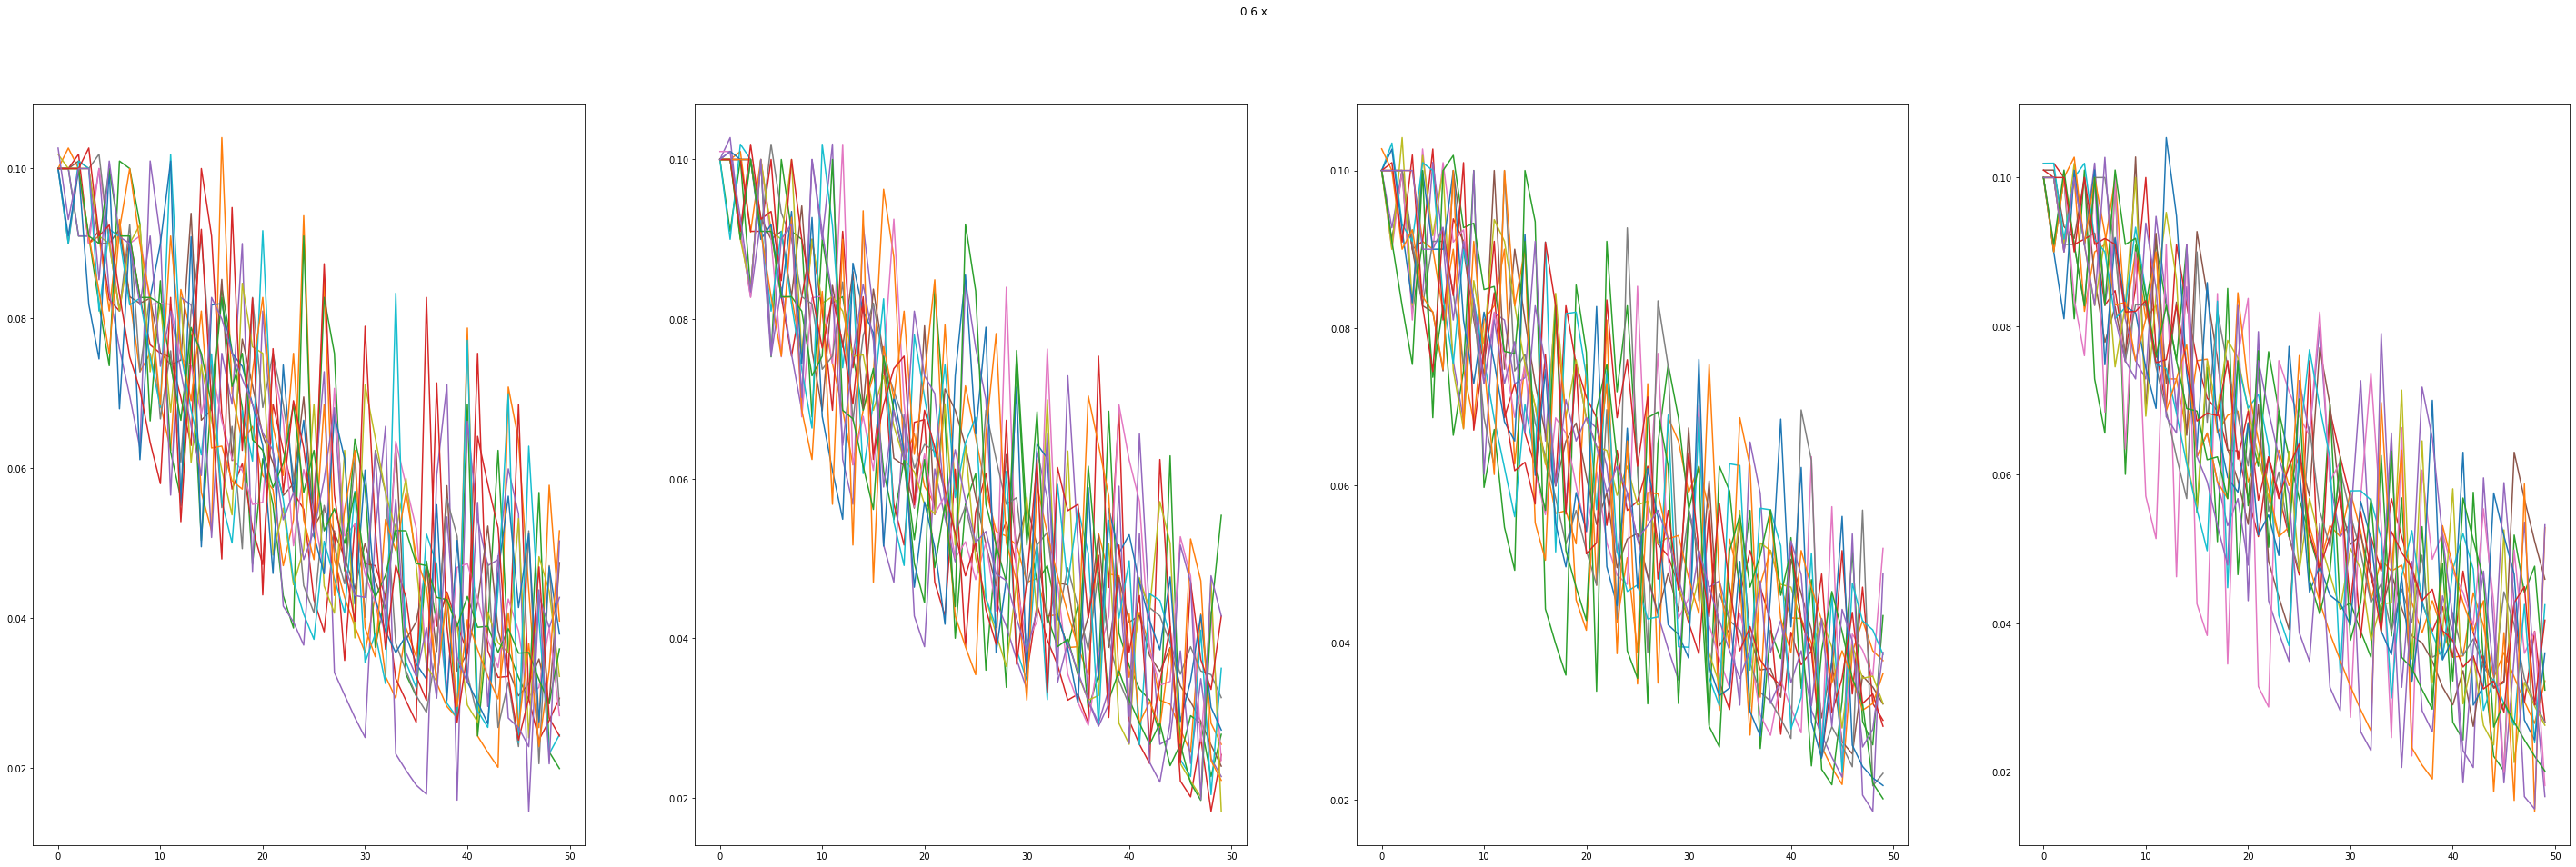

In [0]:
plt.figure(figsize=(20,10))
plt.tight_layout()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(50,15))
fig.suptitle('0.6 x ...')

all_series9 = sarsa(10)
all_series10 = sarsa(100)
all_series11 = sarsa(500)
all_series12 = sarsa(1000)

for series in all_series9:
    ax1.plot(series)
for series in all_series10:
    ax2.plot(series)
for series in all_series11:
    ax3.plot(series)
for series in all_series12:
    ax4.plot(series)

### 2.2

Utilize o algoritmo de Q-learning para o cenário 2.1. Há diferença na política greedy após 50, 100, 1000 e 10000 episódios com relação aos resultados obtidos em 2.1?

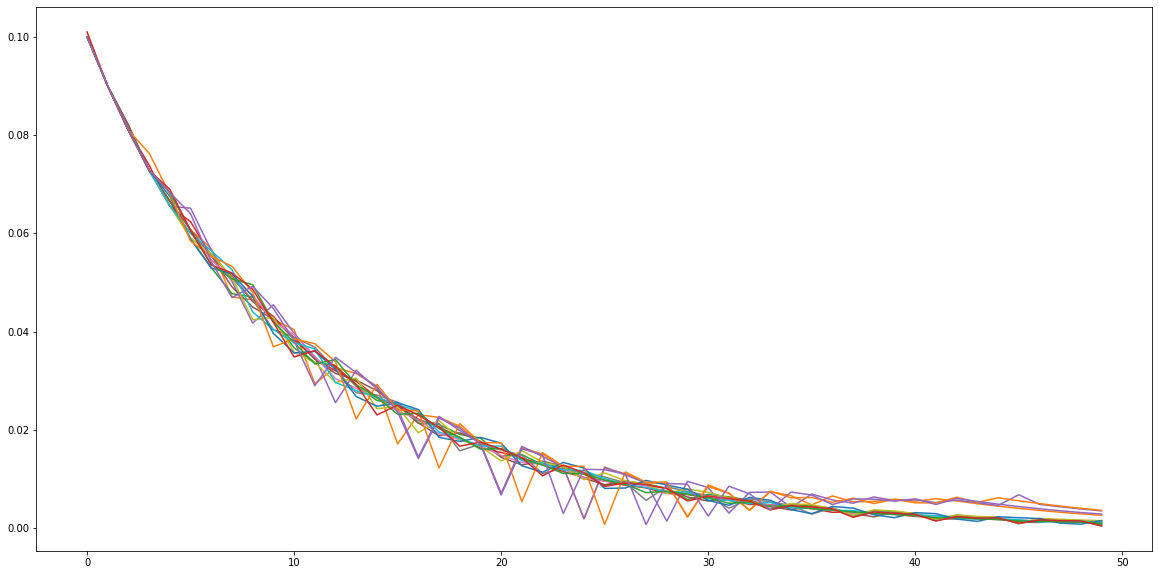

In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

def generateInitialState(states):
    initial_state = random.choice(states[1:-1])
    return tuple(initial_state)
           

def takeAction(state, action, terminal_states, grid_size, reward_value):
    if list(state) in terminal_states:
        return 0, None
    final_state = np.array(state) + np.array(action)
    if -1 in list(final_state) or grid_size in list(final_state):
        final_state = state
    return reward_value, tuple(final_state)

class CellQ:
    def __init__(self, actions, row, col):
        self.cell = (row, col)
        self.value = 0
        self.values = [0 for a in actions];
        self.indexActions = -1;
        
    def epsilon_greedy(self, epsilon, actions ):
        p = np.random.random()
        if (p < epsilon):
            return self.explore(actions)
        else:
            return self.exploit(actions)   
    
    def exploit(self, actions):
        self.indexActions = self.values.index(max(self.values))
        action = actions[self.indexActions]
        return action
 
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action
    
    def learn(self, alpha, reward_value, gamma, cell_final_state ):
        self.value += alpha * (reward_value + gamma * np.max(cell_final_state.values) - self.value)
        self.values[self.indexActions] = self.value
        
    def __str__(self):
        return "cell:{0} value: {1}, top: {2}, down: {3}, right: {4}, left: {5}".format(self.cell, self.value, self.values[0], self.values[1],self.values[2],self.values[3])


def qlearning(epsilon = 0.1, iterations = 1000):
    
    # parameters
    gamma = 0.1 
    reward_value = -1
    grid_size = 4
    alpha = 0.1 
    terminal_states = [[0,0], [grid_size-1, grid_size-1]]
    actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
    
    tmp = [[CellQ(actions,row,col) for row in range(grid_size)] for col in range(grid_size)]
    Q = np.array(tmp)
    #Q = np.zeros((grid_size, grid_size))
    
    returns = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
    deltas = {(i, j):list() for i in range(grid_size) for j in range(grid_size)}
    states = [[i, j] for i in range(grid_size) for j in range(grid_size)]
    values = [0,0,0,0]

    for it in range(iterations):
        s = generateInitialState(states)

            
        while True:
            
            current_cell = Q[s]
            
            #print(current_cell)
            
            action = current_cell.epsilon_greedy(epsilon, actions)
            reward, final_state = takeAction(s, action, terminal_states, grid_size, reward_value)
            

            
            if final_state is None:
                break
            
            next_cell =  Q[final_state]
            old_cell_value = current_cell.value
            #Q[s] += alpha * (reward_value + gamma * Q[final_state] - Q[s])
            current_cell.learn(alpha, reward, gamma, next_cell )
           
            deltas[s].append(float(np.abs(old_cell_value - current_cell.value)))
            
            s = final_state
    
    all_series = [list(x)[:50] for x in deltas.values()]
    return all_series

        
plt.figure(figsize=(20,10))
all_series = qlearning()#[list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

<Figure size 1440x720 with 0 Axes>

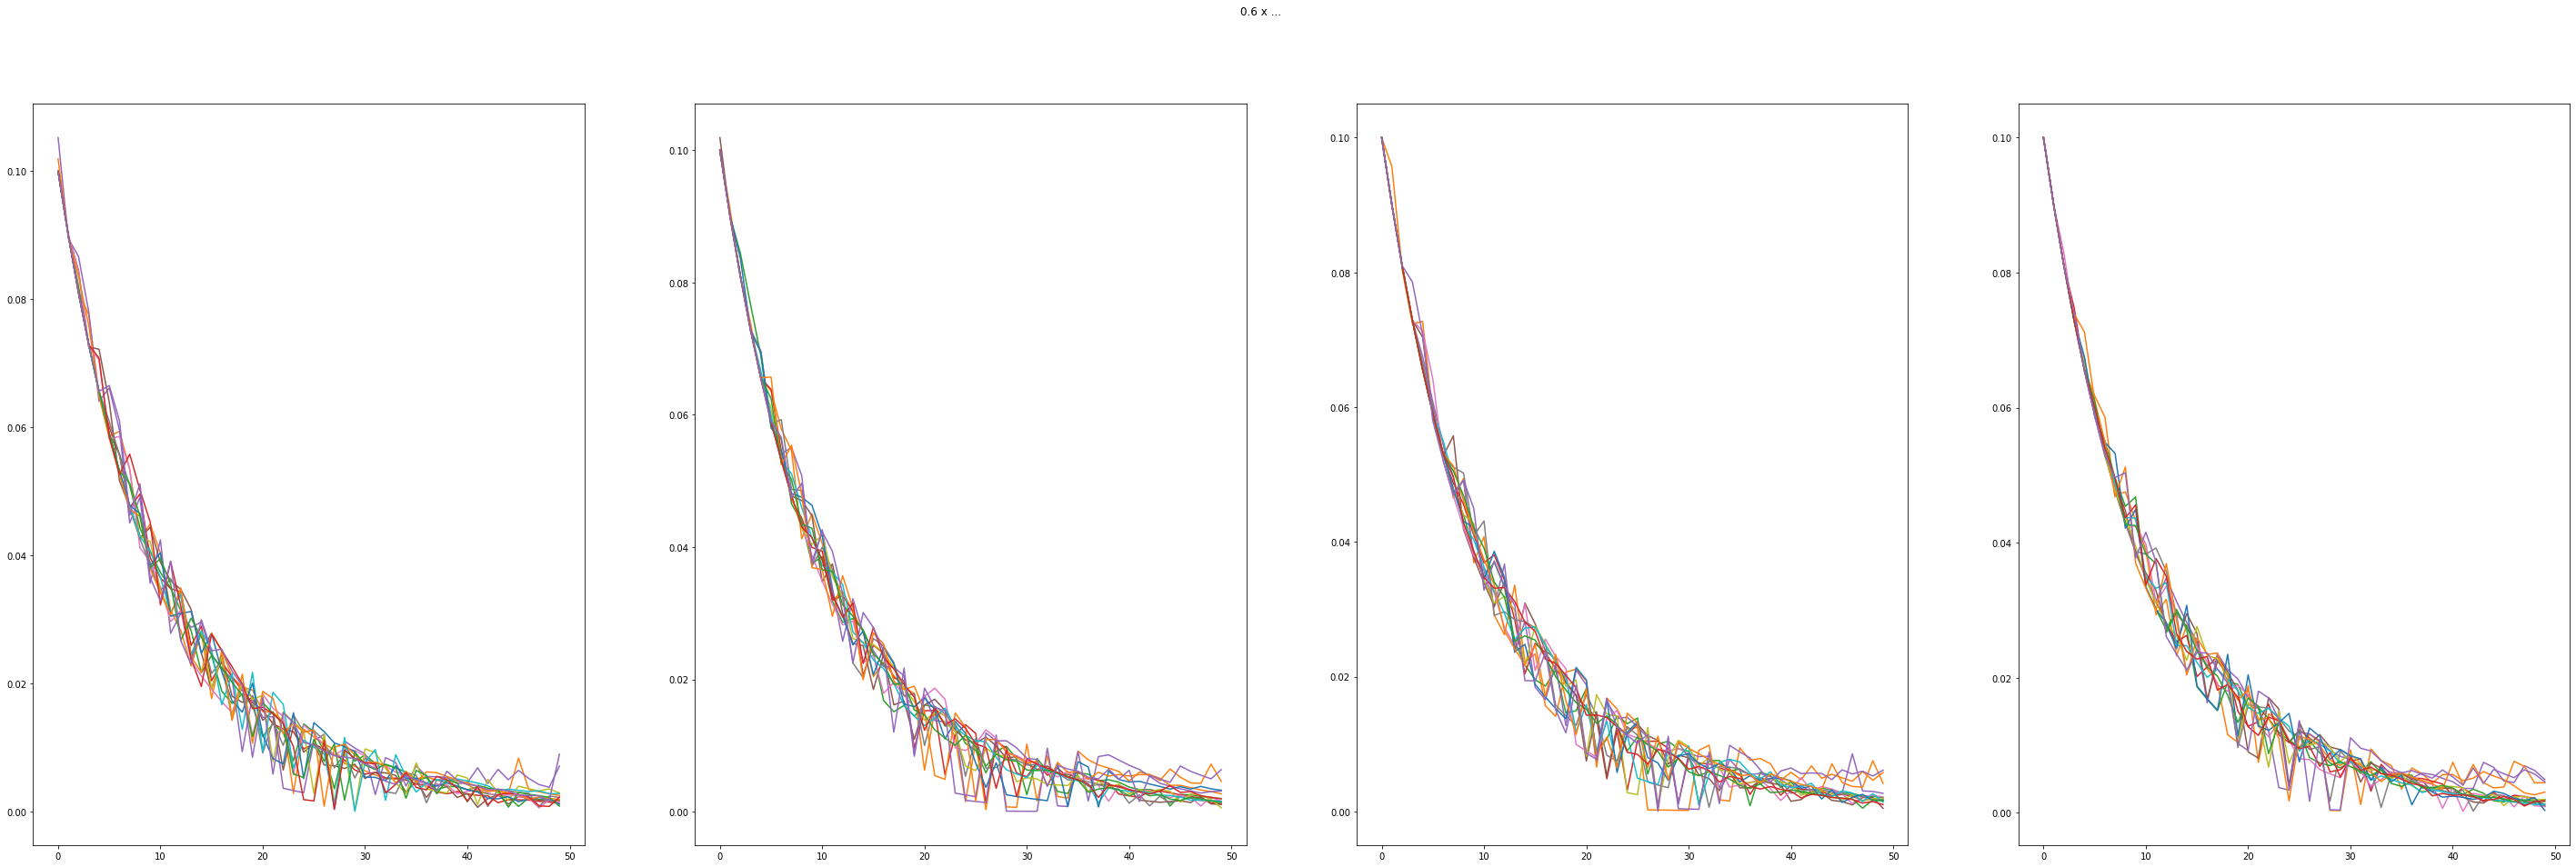

In [0]:
plt.figure(figsize=(20,10))
plt.tight_layout()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(50,15))
fig.suptitle('0.6 x ...')

all_series9 = qlearning(10)
all_series10 = qlearning(100)
all_series11 = qlearning(500)
all_series12 = qlearning(1000)

for series in all_series9:
    ax1.plot(series)
for series in all_series10:
    ax2.plot(series)
for series in all_series11:
    ax3.plot(series)
for series in all_series12:
    ax4.plot(series)

### 2.3

Considere o melhor resultado de 2.1 como baseline de comparação.

Implemente agora o Sars no cenário **Windy Gridworld with King's Moves**, conforme especificado no Exercício 6.9 do livro base.

Esse cenário é o mesmo windy gridworld mas, dessa vez, há oito possíveis ações: as usuais e as ações nas diagonais.

Compare os resultados no grid nas mesmas circunstâncias. Responda com base nos experimentos e plots: ter a disposição mais ações ajuda a acelerar a convergência do algoritmo?

In [0]:
# Células de código aqui

it =  1000  subIt=  97
[['__' 'O_' 'O_' 'NE' '__' '__' '__' '__' '__' '__']
 ['__' 'S_' 'O_' 'O_' 'O_' '__' '__' '__' '__' '__']
 ['__' 'S_' 'S_' 'SO' 'O_' 'SO' '__' '__' '__' '__']
 ['__' 'S_' '__' '__' 'S_' 'S_' '__' '__' '__' '__']
 ['__' 'S_' '__' '__' 'S_' 'S_' '__' 'L_' 'SO' '__']
 ['__' 'S_' 'NO' '__' '__' 'L_' 'S_' 'f_' '__' 'SO']
 ['__' 'NO' 'S_' 'SO' 'SO' '__' 'SO' '__' '__' 'S_']
 ['__' 'O_' 'SO' 'SO' 'SO' 'SO' '__' '__' 'O_' 'S_']
 ['__' '__' 'SO' 'SO' '__' '__' '__' '__' '__' 'S_']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']]
['S_', 'SO', 'S_', 'SO', 'O_', 'O_', 'O_', 'O_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'SO', 'O_', 'SO', 'SO', 'N_', 'S_', 'S_', 'NO', 'S_', 'SO', 'SO', 'L_', 'O_', 'S_', 'S_', 'NO', 'S_', 'S_', 'S_', 'S_', 'S_', 'O_', 'SO', 'SO', 'O_', 'O_', 'O_', 'S_', 'S_', 'S_', 'S_', 'S_', 'SO', 'SO', 'SO', 'SO', 'SO', 'S_', 'O_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'S_', 'O_', 'S_', 'SO', 'S_', 'O_', 'O_', 'O_', 'S_', 'NE', 'O_', '

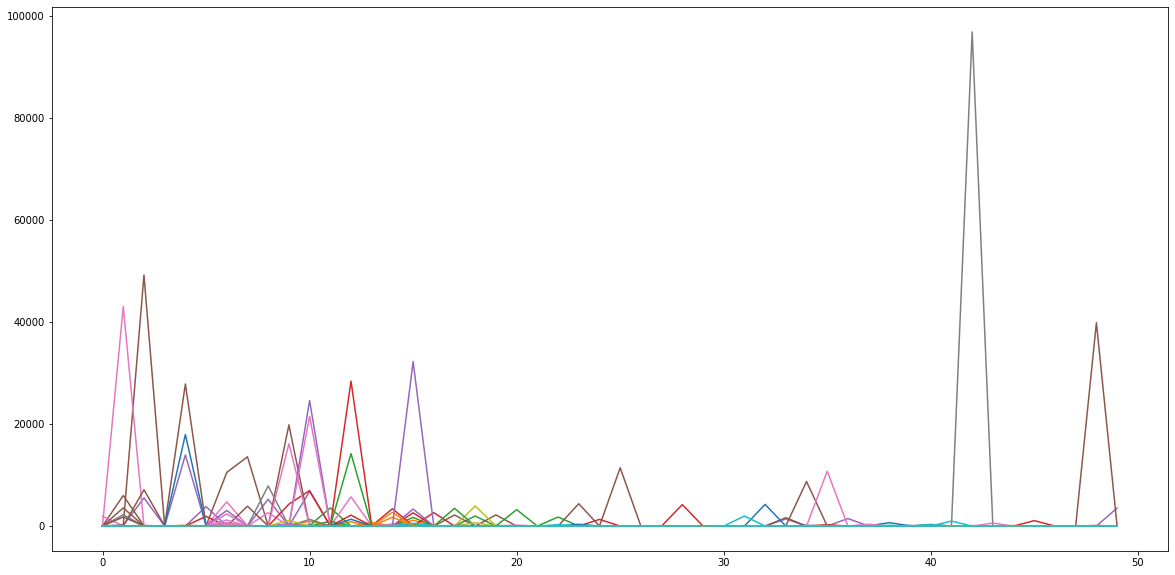

In [0]:


import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


class Mundo:
    
    def __init__(self):
         
        self.row = 10 
        self.col = 10
        
        #self.pcardeais = [
        #         'N_',
        #    'O_',     'L_',
        #         'S_']
        #self.actions = [  
        #                 (-1, 0),
        #        (0, -1),          (0, 1),
        #                 (1,  0)
        #    ]
        
        self.pcardeais = [
            'NO','N_','NE',
            'O_',     'L_',
            'SO','S_','SE']
        self.actions = [  
                (-1, -1), (-1, 0), (-1, 1),
                ( 0, -1),          ( 0, 1),
                ( 1,  1), ( 1, 0), ( 1, 1)
            ]
        
        #self.forca_vento_coluna = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.forca_vento_coluna = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        
        self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
        
        self.inicio = (5, 0)
        self.fim =    (5, 7)
        
        self.movimentos = []
        
    def is_inicio(self, posicao):
        return posicao[0] == self.inicio[0] and posicao[1] == self.inicio[1]
    
    def is_fim(self, posicao):
        return posicao[0] == self.fim[0] and posicao[1] == self.fim[1]
    
    def pcardeal_to_action(self, pcardeal):
        indexes = [i for i,x in enumerate(self.pcardeais) if x == pcardeal]
        return self.actions[indexes[0]]
    
    def action_to_pcardeal(self, action):
        indexes = [i for i,x in enumerate(self.actions) if x == action]
        return self.pcardeais[indexes[0]]
        
    def mover(self, origem, movimento):
        
        destino = np.array(origem) + np.array(movimento)
        
        if -1 in list(destino) or self.col in list(destino):
            self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))  )
            return self.movimentos[-1]
            #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) 
        
        coluna_destino = destino[1]
        forca_vento = self.forca_vento_coluna[coluna_destino]
        
        if forca_vento > 0:
            for it in range(forca_vento):
                destino = np.array(destino) + np.array(self.pcardeal_to_action('N_'))
                if -1 in list(destino) or self.col in list(destino):
                    self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
                    return self.movimentos[-1]
                    #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))
        
        self.movimentos.append( (tuple(destino), self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
        return  self.movimentos[-1]
    
    def limpar_caminho_realizaso(self):
        self.movimentos = []
        
    def caminho_realizaso(self,posicao_inicio):
        
        tmp = [[ '__' for row in range(self.row)] for col in range(self.col)]
        tmp = np.array(tmp)
        tmp[posicao_inicio] = 'i_'
        tmp[self.fim] = 'f_'
        
        
        movs = []
        if len(self.movimentos)>0 :
            for mov in self.movimentos:
                movs.append(mov[1])
                if mov[0] is not None and tmp[mov[0]] !='f_':
                    tmp[mov[0]] = mov[1]
            print(tmp)
        return movs

    def teste(self):
        posicao, movimento, inicio, fim = (self.inicio,'i', True, False)
        for it in range(3):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('S'))
        for it in range(9):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('L'))
        for it in range(8):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('S'))
        for it in range(2):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('O'))
        print(self.caminho_realizaso())

class Cell:
    def __init__(self, actions, row, col):
        self.cell = (row, col)
        self.value = 0
        self.values = [0 for a in actions];
        self.indexActions = -1;
        
    def epsilon_greedy(self, epsilon, actions ):
        p = np.random.random()
        if (p < epsilon):
            action = self.explore(actions)
        else:
            action = self.exploit(actions)   
        
        self.value = self.values[self.indexActions]
        return action  
    
    def exploit(self, actions):
        self.indexActions = self.values.index(max(self.values))
        action = actions[self.indexActions]
        return action
 
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action
    
    def learn(self, alpha, reward_value, gamma, cell_final_state ):
        #self.value += alpha * (reward_value + gamma * cell_final_state.value - self.value)
        self.value += alpha * (reward_value + gamma * cell_final_state.values[self.indexActions] - self.value)
        self.values[self.indexActions] = self.value

class Rei:
    def __init__(self):
        
        self.gamma = 1.0
        self.reward_value = -1
        self.alpha = 0.5 
        self.epsilon = 0.1 
        self.iterations = 10000
        self.Q = None
    
    def takeAction(self, posicao, action, mundo):
        
        
        #if mundo.is_inicio(tuple(posicao)) or mundo.is_fim(tuple(posicao)):
        if mundo.is_fim(tuple(posicao)):
            return 0, None
        
        nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)
        #print(mundo.action_to_pcardeal(action))
        #final_state = np.array(state) + np.array(action)
        #print(movimento)
        #saiu do mundo
        if nova_posicao is None or inicio:
            return -100, posicao
        
        return self.reward_value, tuple(nova_posicao)
        
    
    def learn(self, mundo):
        
        deltas = {(row, col):list() for row in range(mundo.row) for col in range(mundo.col)}
        
        tmp = [[Cell(mundo.actions,row,col) for row in range(mundo.row)] for col in range(mundo.col)]
        self.Q = np.array(tmp)
        
        for it in range(self.iterations):
            

            #print(it)
            posicao = tuple(random.choice(mundo.grade))
            #posicao = mundo.inicio
            
            posicao_i = posicao
            
            mundo.limpar_caminho_realizaso()
            
            sub = 0
            while True:
                sub += 1
                
                if sub>1000:
                    break
            
                current_cell = self.Q[posicao]
                
                #print(current_cell)
                
                action = current_cell.epsilon_greedy(self.epsilon, mundo.actions)
                reward, nova_posicao = self.takeAction(posicao, action, mundo)
                
                if nova_posicao is None:
                    break
                
                next_cell =  self.Q[nova_posicao] 
                old_cell_value = current_cell.value
                #Q[s] += alpha * (reward_value + gamma * Q[nova_posicao] - Q[s])
                current_cell.learn(self.alpha, reward, self.gamma, next_cell )
               
                deltas[posicao].append(float(np.abs(old_cell_value - current_cell.value)))
                
                posicao = nova_posicao
                
                #if reward == -1:
                    #print(it)
                #    break
            if it in [1000,5000,9000]:
                print('it = ',it, ' subIt= ',sub)
                print(mundo.caminho_realizaso(posicao_i))
        print('fim.')
        all_series = [list(x)[:50] for x in deltas.values()]
        return all_series
    
    def melhor_caminho(self,posicao_inicio, mundo):

        #posicao = mundo.inicio
        posicao = posicao_inicio
        
        mundo.limpar_caminho_realizaso()
        
        for it in range(20):
            
            current_cell = self.Q[posicao]
            
            #print(current_cell)
            
            action = current_cell.epsilon_greedy(-1, mundo.actions)
            nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)
            
            if nova_posicao is None or fim:
                break
            
            next_cell =  self.Q[nova_posicao] 
            posicao = nova_posicao
            
        return mundo.caminho_realizaso(posicao_inicio)
        
        
       
#Mundo().teste()      


mundo = Mundo() 
rei = Rei()
melhor_caminho = rei.learn(mundo)

print(rei.melhor_caminho(mundo.inicio, mundo))

plt.figure(figsize=(20,10))
all_series = melhor_caminho
for series in all_series:
    plt.plot(series)

    
   


### 2.4

Considere o algoritmo de Q-learning. Dessa vez modele um cenário de **Stochastic Windy Gridworld** conforme apresentado no exerício 6.10 do livro base.

Nesse cenário, o vento, ao invés de ter um impacto definido deterministicamente, tem um comportamento estocástico: pode mover o agente 1 célula para cima, 2 células para cima ou 1 célula para baixo. Cada uma dessas situações tem uma probabilidade 1/3 de acontecer.

Por exemplo, se você está á direita do estado objetivo e escolhe a ação "esquerda", em 1/3 das vezes você terminará uma célula acima do objetivo, em 1/3 das vezes você terminará duas células acima do objetivo e em 1/3 das vezes você terminará 1 célula abaixo do objetivo.

In [0]:
# Células de código aqui

it =  1000  subIt=  10
[['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' 'i_' 'SO' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' 'SO']
 ['__' '__' '__' '__' '__' '__' '__' 'f_' '__' 'S_']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' 'S_']
 ['__' '__' '__' '__' '__' '__' '__' '__' 'O_' 'S_']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' 'S_']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']]
['SO', 'SO', 'S_', 'S_', 'S_', 'L_', 'S_', 'O_', 'O_']
it =  5000  subIt=  6
[['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' '__' '__' '__']
 ['__' '__' '__' '__' '__' '__' '__' 'f_' '__' '__']
 ['__' '__' '__' '__' '__' '__' 'SO' '__' '__' '__'

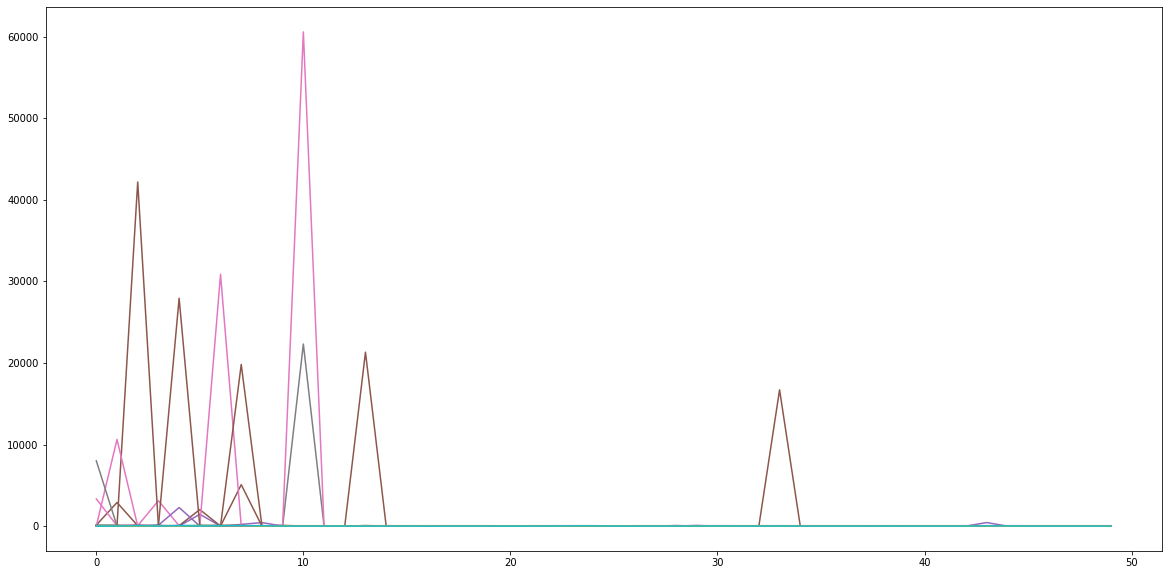

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 11 10:29:42 2020

https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf

Exemplo 6.5: Mundo da grade ventoso A Figura 6.10 mostra um mundo da grade padrão, 
com estados de início e objetivo, mas com uma diferença: existe um vento cruzado para cima no meio da grade. 
As ações são as quatro padrão - cima, baixo, direita e esquerda - mas na região central os próximos estados 
resultantes são deslocados para cima por um "vento", cuja força varia de coluna para coluna. 
A força do vento é dada abaixo de cada coluna, em número de células 
deslocadas SG 0 0 0 1 1 1 2 2 1 0 movimentos padrão dos movimentos do rei 
Figura 6.10: Mundo da grade no qual o movimento é alterado por um dependente da localização, ascendente "vento".



341/5000
Exercício 6.6: Mundo da Grade Ventoso com Movimentos do Rei 
Resolva a tarefa do mundo da grade ventoso assumindo oito ações possíveis, 
incluindo os movimentos diagonais, em vez das quatro usuais. 
Quanto melhor você pode fazer com as ações extras? 
Você pode se sair melhor incluindo uma nona ação que não causa nenhum movimento além daquele causado pelo vento?

@author: dgiroto
"""

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


class Mundo:
    
    def __init__(self):
         
        self.row = 10 
        self.col = 10
        
        #self.pcardeais = [
        #         'N_',
        #    'O_',     'L_',
        #         'S_']
        #self.actions = [  
        #                 (-1, 0),
        #        (0, -1),          (0, 1),
        #                 (1,  0)
        #    ]
        
        self.pcardeais = [
            'NO','N_','NE',
            'O_',     'L_',
            'SO','S_','SE']
        self.actions = [  
                (-1, -1), (-1, 0), (-1, 1),
                ( 0, -1),          ( 0, 1),
                ( 1,  1), ( 1, 0), ( 1, 1)
            ]
        
        #self.forca_vento_coluna = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.forca_vento_coluna = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        
        self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
        
        self.inicio = (5, 0)
        self.fim =    (5, 7)
        
        self.movimentos = []
        
    def is_inicio(self, posicao):
        return posicao[0] == self.inicio[0] and posicao[1] == self.inicio[1]
    
    def is_fim(self, posicao):
        return posicao[0] == self.fim[0] and posicao[1] == self.fim[1]
    
    def pcardeal_to_action(self, pcardeal):
        indexes = [i for i,x in enumerate(self.pcardeais) if x == pcardeal]
        return self.actions[indexes[0]]
    
    def action_to_pcardeal(self, action):
        indexes = [i for i,x in enumerate(self.actions) if x == action]
        return self.pcardeais[indexes[0]]
        
    def mover(self, origem, movimento):
        
        destino = np.array(origem) + np.array(movimento)
        
        if -1 in list(destino) or self.col in list(destino):
            self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))  )
            return self.movimentos[-1]
            #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) 
        
        coluna_destino = destino[1]
        forca_vento = self.forca_vento_coluna[coluna_destino]
        
        if forca_vento > 0:
            for it in range(forca_vento):
                destino = np.array(destino) + np.array(self.pcardeal_to_action('N_'))
                if -1 in list(destino) or self.col in list(destino):
                    self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
                    return self.movimentos[-1]
                    #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))
        
        self.movimentos.append( (tuple(destino), self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
        return  self.movimentos[-1]
    
    def limpar_caminho_realizaso(self):
        self.movimentos = []
        
    def caminho_realizaso(self,posicao_inicio):
        
        tmp = [[ '__' for row in range(self.row)] for col in range(self.col)]
        tmp = np.array(tmp)
        tmp[posicao_inicio] = 'i_'
        tmp[self.fim] = 'f_'
        
        
        movs = []
        if len(self.movimentos)>0 :
            for mov in self.movimentos:
                movs.append(mov[1])
                if mov[0] is not None and tmp[mov[0]] !='f_':
                    tmp[mov[0]] = mov[1]
            print(tmp)
        return movs

    def teste(self):
        posicao, movimento, inicio, fim = (self.inicio,'i', True, False)
        for it in range(3):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('S'))
        for it in range(9):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('L'))
        for it in range(8):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('S'))
        for it in range(2):
            posicao, movimento, inicio, fim = self.mover(posicao, self.pcardeal_to_action('O'))
        print(self.caminho_realizaso())

class Cell:
    def __init__(self, actions, row, col):
        self.cell = (row, col)
        self.value = 0
        self.values = [0 for a in actions];
        self.indexActions = -1;
        
    def epsilon_greedy(self, epsilon, actions ):
        p = np.random.random()
        if (p < epsilon):
            action = self.explore(actions)
        else:
            action = self.exploit(actions)   
        
        self.value = self.values[self.indexActions]
        return action  
    
    def exploit(self, actions):
        self.indexActions = self.values.index(max(self.values))
        action = actions[self.indexActions]
        return action
 
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action
    
    def learn(self, alpha, reward_value, gamma, cell_final_state ):
        #self.value += alpha * (reward_value + gamma * cell_final_state.value - self.value)
        #self.value += alpha * (reward_value + gamma * cell_final_state.values[self.indexActions] - self.value)
        self.value += alpha * (reward_value + gamma * np.max(cell_final_state.values) - self.value)
        self.values[self.indexActions] = self.value

class Rei:
    def __init__(self):
        
        self.gamma = 1.0
        self.reward_value = -1
        self.alpha = 0.5 
        self.epsilon = 0.1 
        self.iterations = 10000
        self.Q = None
    
    def takeAction(self, posicao, action, mundo):
        
        
        #if mundo.is_inicio(tuple(posicao)) or mundo.is_fim(tuple(posicao)):
        if mundo.is_fim(tuple(posicao)):
            return 0, None
        
        nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)
        #print(mundo.action_to_pcardeal(action))
        #final_state = np.array(state) + np.array(action)
        #print(movimento)
        #saiu do mundo
        if nova_posicao is None or inicio:
            return -100, posicao
        
        return self.reward_value, tuple(nova_posicao)
        
    
    def learn(self, mundo):
        
        deltas = {(row, col):list() for row in range(mundo.row) for col in range(mundo.col)}
        
        tmp = [[Cell(mundo.actions,row,col) for row in range(mundo.row)] for col in range(mundo.col)]
        self.Q = np.array(tmp)
        
        for it in range(self.iterations):
            

            #print(it)
            posicao = tuple(random.choice(mundo.grade))
            #posicao = mundo.inicio
            
            posicao_i = posicao
            
            mundo.limpar_caminho_realizaso()
            
            sub = 0
            while True:
                sub += 1
                
                if sub>1000:
                    break
            
                current_cell = self.Q[posicao]
                
                #print(current_cell)
                
                action = current_cell.epsilon_greedy(self.epsilon, mundo.actions)
                reward, nova_posicao = self.takeAction(posicao, action, mundo)
                
                if nova_posicao is None:
                    break
                
                next_cell =  self.Q[nova_posicao] 
                old_cell_value = current_cell.value
                #Q[s] += alpha * (reward_value + gamma * Q[nova_posicao] - Q[s])
                current_cell.learn(self.alpha, reward, self.gamma, next_cell )
               
                deltas[posicao].append(float(np.abs(old_cell_value - current_cell.value)))
                
                posicao = nova_posicao
                
                #if reward == -1:
                    #print(it)
                #    break
            if it in [1000,5000,9000]:
                print('it = ',it, ' subIt= ',sub)
                print(mundo.caminho_realizaso(posicao_i))
        print('fim.')
        all_series = [list(x)[:50] for x in deltas.values()]
        return all_series
    
    def melhor_caminho(self,posicao_inicio, mundo):

        #posicao = mundo.inicio
        posicao = posicao_inicio
        
        mundo.limpar_caminho_realizaso()
        
        for it in range(20):
            
            current_cell = self.Q[posicao]
            
            #print(current_cell)
            
            action = current_cell.epsilon_greedy(-1, mundo.actions)
            nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)
            
            if nova_posicao is None or fim:
                break
            
            next_cell =  self.Q[nova_posicao] 
            posicao = nova_posicao
            
        return mundo.caminho_realizaso(posicao_inicio)
        
        
       
#Mundo().teste()      


mundo = Mundo() 
rei = Rei()
melhor_caminho = rei.learn(mundo)

print(rei.melhor_caminho(mundo.inicio, mundo))

plt.figure(figsize=(20,10))
all_series = melhor_caminho
for series in all_series:
    plt.plot(series)

    


### 2.5

Implemente o cenário do "The Cliff", apresentado em sala de aula. Utilize tanto o Sars quanto o Q-learning. Faça comparações dos resultados com a política greedy do agente após 100, 1000 e 10000 episódios.

OBS.: utilize uma estratégia epsilon-greedy para a dinâmica do agente. Especifique hiperparâmetros de forma a conseguir convergência do algoritmo.

In [0]:
# Células de código aqui

# Exercício 3 <EM CONSTRUÇÃO>

Uso de modelos de aprendizado por reforço profundo.

# Exercício 4 <EM CONSTRUÇÃO>

Experimentos com autoencoders.